<h1> NLP and the Web: Home Exercise 2 </h1>

Language Modeling is one of the most crucial tasks in natural language processing. According to <a href="https://web.stanford.edu/~jurafsky/slp3/3.pdf">Jurafsky \& Martin, 2019</a> the simplest approach for a language model is assigning probabilities to  sentences and sequences of words, also known as n-grams, where n is a number. For instance, a bigram (2-gram) is a sequence of two words. In order to assign probabilities, we need to calculate the frequency of the bigram and divide it by the total number of bigrams in a corpus. Below you find a matrix of bigram counts for eight words (Taken from <a href="https://web.stanford.edu/~jurafsky/slp3/3.pdf">Jurafsky \& Martin, 2019</a>).

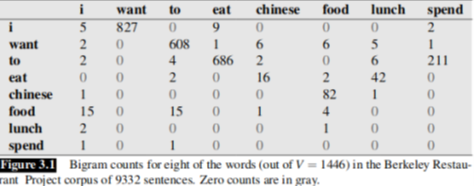

Using the knowledge presented in the last class, do the following exercises. Next to the standard python funtionality you are allowed to use the following libraries: <a href="https://pandas.pydata.org/docs/">pandas</a>, <a href="https://numpy.org/">numpy</a>, <a href="https://scikit-learn.org/stable/">scikit-learn</a>. We've already imported pandas and numpy for you.





In [1]:
# Imports
import pandas as pd
import numpy as np

## Task 1 - 2 Points
Using the data structures presented in today’s class do the following tasks. You are allowed to use additional cells for further calculations.

For this task you have to use the dataset from the file yelp_polarity.txt. This file has two columns which are separated by '\t'. The first column contains reviews and the second column contains a sentiment label per review (0=negative, 1=positive).

##### a) Read the file yelp_polarity.txt into a dataframe and implement the function `word_tokenize_without_punctuation`. It shall tokenize the sentences in file yelp_polarity.txt, removing punctuation ( '.', ',', ':', ';', '?', '!') and lowercasing. This function shall be applied to each sentence in the dataframe . The result shall be appended as an additional column.

In [2]:
df = pd.read_csv('yelp_polarity.txt', sep="\t", header=None)
print(df.head)

<bound method NDFrame.head of                                                      0  1
0                             Wow... Loved this place.  1
1                                   Crust is not good.  0
2            Not tasty and the texture was just nasty.  0
3    Stopped by during the late May bank holiday of...  1
4    The selection on the menu was great and so wer...  1
..                                                 ... ..
995  I think food should have flavor and texture an...  0
996                           Appetite instantly gone.  0
997  Overall I was not impressed and would not go b...  0
998  The whole experience was underwhelming, and I ...  0
999  Then, as if I hadn't wasted enough of my life ...  0

[1000 rows x 2 columns]>


In [3]:
def word_tokenize_without_punctuation(text):
    """
    Segments a stream of characters into tokens and removes puntuation
    Example: "Wow... Loved this place." => ["wow", "loved", "this", "place"]
    @param text: String that should be tokenized
    @return: List of token strings
    """
    # Remove the following characters    
    punctuation = ['.', ',', ':', ';', '?', '!']
    
    # split words by whitespace
    token_list= text.split(" ")
    
    cleaned_tokens= []
    # clean up 
    for token in token_list:
        for char in token:
            if char in punctuation:
                token = token.replace(char,"")
                
        cleaned_tokens.append(token.lower())
     
    cleaned_tokens = list(filter(None, cleaned_tokens))  
    
    return cleaned_tokens       

In [4]:
text = "Wow... Loved this place."
tokens = word_tokenize_without_punctuation(text)

print(tokens)

['wow', 'loved', 'this', 'place']


In [5]:
tokens_col = []

for i in range(len(df)):
    tokens_col.append(word_tokenize_without_punctuation(df.loc[i][0]))
    
# add additional column to the dataframe
result = pd.concat([df, pd.Series(tokens_col)], axis=1)

In [6]:
print(result.iloc[i,2])

['then', 'as', 'if', 'i', "hadn't", 'wasted', 'enough', 'of', 'my', 'life', 'there', 'they', 'poured', 'salt', 'in', 'the', 'wound', 'by', 'drawing', 'out', 'the', 'time', 'it', 'took', 'to', 'bring', 'the', 'check']


##### b) Implement the method `count_bigrams`. It shall calculate bigram counts. (Bigrams are sequences of two tokens).
Hint: You are allowed to use standard python libararies. Checkout the package <a href="https://docs.python.org/3/library/collections.html#module-collections">collections</a> which may make your life easier.

In [7]:
from collections import Counter 

def get_vocab(corpus):
    vocab = []
    
    for token in corpus: 
        if token not in vocab:
            vocab.append(token)
    return vocab
    
def build_freqs(vocab):
    freqs = {}
    len_vocab = len(vocab)
    
    for token in vocab:
        for i in range(len_vocab):
            bigram = (token, vocab[i])
            freqs[bigram] = 0
    return freqs

def count_bigrams(tokenized_text,freqs):
    """
    Counts bigrams in a list with tokenized texts
    @param tokenized_text: list that contains tokens
    @return: List of bigram counts
    """
    for i in range(len(tokenized_text)-1):
        freqs[(tokenized_text[i],tokenized_text[i+1])] +=1    
    
    return freqs


In [10]:
# merge dataframe column 
corpus = []
for text in result.iloc[:,2]:
    corpus = corpus + text

vocab = get_vocab(corpus)
freqs = build_freqs(vocab)

for i in range(len(df)):
    count_bigrams(result.iloc[i,2], freqs)

##### c) Print the 10 most frequent bigrams and their frequency.

In [12]:
sorted_dict = sorted([(v,k) for (k,v) in freqs.items()], reverse=True)

for i in range(10):
    print(sorted_dict[i])

(73, ('this', 'place'))
(47, ('the', 'food'))
(41, ('it', 'was'))
(38, ('and', 'the'))
(32, ('food', 'was'))
(29, ('of', 'the'))
(27, ('and', 'i'))
(26, ('service', 'was'))
(25, ('on', 'the'))
(24, ('the', 'service'))


##### d) Implement the method `bigram_matrix`.  Print a bigram matrix (similar to Jurafsky & Martin above) from all tokens of the 10 most frequent bigrams.

In [13]:
def bigram_matrix(bigram_counts):
    """
    Prints a bigram matrix
    @param most_common: most common bigrams
    @param bigram_counts: dictionary with bigrams and their counts
    """
    
    tokens =[]
    for item in bigram_counts:
        if item[1][0] not in tokens: 
            tokens.append(item[1][0])
        if item[1][1] not in tokens: 
            tokens.append(item[1][1])
    
    num_col = len(tokens)
    bigram_matrix = np.zeros(shape=(num_col,num_col))
    
    for i in range(num_col):
        for j in range(num_col):
            bigram_matrix[i,j] = freqs[(tokens[i],tokens[j])]
       
    df_matrix = pd.DataFrame(bigram_matrix, columns=tokens, index=tokens)
    return df_matrix

In [14]:
mat = bigram_matrix(sorted_dict[0:10])
mat

,this,place,the,food,it,was,and,of,i,service,on
this,0.0,73.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
place,0.0,0.0,1.0,0.0,0.0,4.0,3.0,0.0,2.0,0.0,0.0
the,0.0,12.0,0.0,47.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0
food,0.0,0.0,0.0,0.0,0.0,32.0,12.0,0.0,2.0,1.0,0.0
it,0.0,0.0,0.0,0.0,0.0,41.0,3.0,0.0,1.0,0.0,0.0
was,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
and,4.0,0.0,38.0,4.0,17.0,5.0,0.0,0.0,27.0,5.0,0.0
of,4.0,1.0,29.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
i,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0
service,0.0,0.0,1.0,0.0,0.0,26.0,7.0,1.0,3.0,0.0,0.0


## Task 2 - 3 Points
Using the code of Task 1:

##### a) Implement the method `get_top_k_bigrams`. It shall extract the top 20 most frequent bigrams from a given dataframe. 

In [15]:
def get_top_k_bigrams(dataframe, label, k=20):
    """
    Selects the top k bigram from a list/ dataframe of bigrams for negative and positive documents
    @param dataframe: list or dataframe that contains bigrams and their counts
    @param label: 0 for negative, and 1 for positive documents
    @param k: Number of top bigrams to be selected
    @return: List of top k bigrams
    """
    labeled = dataframe[dataframe.iloc[:,1]==label]

    # merge dataframe column 
    corpus = []
    for text in labeled.iloc[:,2]:
        corpus = corpus + text

    vocab = get_vocab(corpus)
    
    bigrams_dict = build_freqs(vocab)

    for idx in range(len(labeled)):
        count_bigrams(labeled.iloc[idx,2],bigrams_dict)
        
    sorted_dict = sorted([(v,k) for (k,v) in bigrams_dict.items()], reverse=True)
    
    return sorted_dict[0:20]

##### Apply it to find the top 20 bigrams of all positive and negative documents in the file yelp_polarity.txt. (40 bigrams in total, 20 from positive and 20 from negative labled documents)

In [16]:
top_20_neg = get_top_k_bigrams(result, 0, 20)
top_20_pos = get_top_k_bigrams(result, 1,20)

print("Top 20 bigrams from negative comments:")
for i in range(len(top_20_neg)):
    print(top_20_neg[i])

print("\n  \n \n")
print("Top 20 bigrams from positive comments:") 
for i in range(len(top_20_pos)):
    print(top_20_pos[i])    


Top 20 bigrams from negative comments:
(36, ('this', 'place'))
(25, ('it', 'was'))
(24, ('the', 'food'))
(17, ('was', 'a'))
(15, ('of', 'the'))
(15, ('i', 'was'))
(15, ('food', 'was'))
(14, ('and', 'the'))
(13, ('to', 'be'))
(13, ('the', 'service'))
(12, ("won't", 'be'))
(12, ('service', 'was'))
(12, ('go', 'back'))
(11, ('was', 'not'))
(11, ('i', 'would'))
(11, ('i', 'had'))
(11, ('and', 'i'))
(10, ('of', 'a'))
(10, ('i', 'have'))
(10, ('i', "don't"))

  
 

Top 20 bigrams from positive comments:
(37, ('this', 'place'))
(24, ('and', 'the'))
(23, ('the', 'food'))
(17, ('was', 'very'))
(17, ('food', 'was'))
(16, ('the', 'best'))
(16, ('on', 'the'))
(16, ('it', 'was'))
(16, ('and', 'i'))
(15, ('this', 'is'))
(14, ('service', 'was'))
(14, ('of', 'the'))
(13, ('a', 'great'))
(12, ('place', 'is'))
(11, ('the', 'service'))
(11, ('is', 'a'))
(11, ('in', 'the'))
(11, ('for', 'the'))
(10, ('very', 'good'))
(10, ('i', 'had'))


##### b) Implement the method `get_probability_of_bigrams`.  It shall calculate the probability of the top 20 frequent bigrams (for positive and negative) from 2a). Follow the definition stated above and compute the probabilities based on the full dataset provided (i.e. based on all bigrams in all reviews).

In [17]:
def get_probability_of_bigrams(bigram_counts, top_k):
    """
    Calculates the probabilty of bigrams
    @param bigram_counts: sum of all bigrams (including duplicates)
    @param top_k: list of top k bigrams (from previous task)
    @return: List of bigram probabilities
    """
    num_bigram = len(bigram_counts)
    prob_list = []   
    
    for bigram in top_k:
        prob = bigram[0]/num_bigram
        prob_list.append(prob)
        
    return prob_list

In [19]:
print("Probability of top 20 bigrams from negative comments:")
prob_pos_top_20 = get_probability_of_bigrams(freqs,top_20_pos)
for x,y in zip(prob_pos_top_20, top_20_pos):
    print(x, y)

print("\n \n \n")

print("Probability of top 20 bigrams from negative comments:")    
prob_neg_top_20 = get_probability_of_bigrams(freqs,top_20_neg)
for x,y in zip(prob_neg_top_20, top_20_neg):
    print(x, y)

Probability of top 20 bigrams from negative comments:
7.996885969377114e-06 (37, ('this', 'place'))
5.187169277433804e-06 (24, ('and', 'the'))
4.971037224207395e-06 (23, ('the', 'food'))
3.674244904848944e-06 (17, ('was', 'very'))
3.674244904848944e-06 (17, ('food', 'was'))
3.458112851622536e-06 (16, ('the', 'best'))
3.458112851622536e-06 (16, ('on', 'the'))
3.458112851622536e-06 (16, ('it', 'was'))
3.458112851622536e-06 (16, ('and', 'i'))
3.2419807983961273e-06 (15, ('this', 'is'))
3.0258487451697187e-06 (14, ('service', 'was'))
3.0258487451697187e-06 (14, ('of', 'the'))
2.80971669194331e-06 (13, ('a', 'great'))
2.593584638716902e-06 (12, ('place', 'is'))
2.3774525854904934e-06 (11, ('the', 'service'))
2.3774525854904934e-06 (11, ('is', 'a'))
2.3774525854904934e-06 (11, ('in', 'the'))
2.3774525854904934e-06 (11, ('for', 'the'))
2.161320532264085e-06 (10, ('very', 'good'))
2.161320532264085e-06 (10, ('i', 'had'))

 
 

Probability of top 20 bigrams from negative comments:
7.78075391615

##### c) Write a script to save in a file the most probable bigrams of both classes and their probabilities separated by tabs. Write one file per polarity label (0, 1). 

In [20]:
with open("top_20_pos.txt","w") as outfile: 
    for x,y in zip(prob_pos_top_20, top_20_pos):
        outfile.write(str(x)+'\t'+str(y)+'\n')
        
with open("top_20_neg.txt","w") as outfile: 
    for x,y in zip(prob_neg_top_20, top_20_neg):
        outfile.write(str(x)+'\t'+str(y)+'\n')

##### d) Compare the output of both classes and write an analysis of your observations in up to two sentences. Do those classes share some bigrams or are they totally different?

The two classes share some common phrases, which are also common grammatical structures in english. In order to see the polarity of bigrams in negative and positive classes some common word such as "I, we, have,..." should be removed in advance.

Please upload in Moodle your working Jupyter-Notebook <b>before next lab session</b> <span style="color:red">(Nov 19st, 4:14pm)</span>. Submission format: ExerciseX_YourName.zip<br>
Submission should contain your filled out Jupyter notebook template (naming schema: ExerciseX_YourName.ipynb) and any auxiliar files that are necessary to run your code (e.g. datasets provided by us)